In [2]:
print("all ok")

all ok


In [3]:
import sys, os

# Get project root — one level up from 'research_and_analyst'
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)

Project root added to path: /Users/apple/Documents/Dev_Stuff/autoresearch/self_learning


In [4]:
from research_and_analyst.utils.model_loader import ModelLoader

In [5]:
model_loader = ModelLoader()

{"timestamp": "2025-11-14T15:52:58.740124Z", "level": "info", "event": "Running in LOCAL mode: .env loaded"}
{"timestamp": "2025-11-14T15:52:58.740804Z", "level": "info", "event": "Loaded GROQ_API_KEY from individual env var"}
{"timestamp": "2025-11-14T15:52:58.741359Z", "level": "info", "event": "Loaded GOOGLE_API_KEY from individual env var"}
{"timestamp": "2025-11-14T15:52:58.741988Z", "level": "info", "event": "Loaded ASTRA_DB_API_ENDPOINT from individual env var"}
{"timestamp": "2025-11-14T15:52:58.742462Z", "level": "info", "event": "Loaded ASTRA_DB_APPLICATION_TOKEN from individual env var"}
{"timestamp": "2025-11-14T15:52:58.742842Z", "level": "info", "event": "Loaded ASTRA_DB_KEYSPACE from individual env var"}
{"keys": {"GROQ_API_KEY": "gsk_o4...", "GOOGLE_API_KEY": "AIzaSy...", "ASTRA_DB_API_ENDPOINT": "https:...", "ASTRA_DB_APPLICATION_TOKEN": "AstraC...", "ASTRA_DB_KEYSPACE": "defaul..."}, "timestamp": "2025-11-14T15:52:58.743333Z", "level": "info", "event": "API keys loade

In [6]:
llm=model_loader.load_llm()

{"provider": "google", "model": "gemini-2.0-flash", "timestamp": "2025-11-14T15:53:00.175524Z", "level": "info", "event": "Loading LLM"}
E0000 00:00:1763135580.187930  453222 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [7]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [8]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [9]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage,HumanMessage , SystemMessage
from langgraph.checkpoint.memory import MemorySaver

#health

Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
        ),

Analyst(
    name="Dr. Arun Verma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explores ethical implications of AI in diagnostics."
),
Analyst(
    name="Ms. Priya Sharma",
    role="Policy Analyst",
    affiliation="Ministry of Health",
    description="Investigates AI policy and compliance frameworks."
)

In [10]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [17]:
Analyst(
    name="Akash Naskar",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

Analyst(name='Akash Naskar', role='genai eng', affiliation='AI Research LAB', description='I am genai developer as well as mentor')

In [12]:
analyst = Analyst(
    name="sunny savita",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [18]:
analyst.name

'sunny savita'

In [19]:
analyst.role

'genai eng'

In [20]:
analyst.affiliation

'AI Research LAB'

In [21]:
print(analyst.persona)

Name: sunny savita
Role: genai eng
Affiliation: AI Research LAB
Description: I am genai developer as well as mentor



In [22]:
class Perspectives(BaseModel):
       analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [23]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    

In [24]:
GenerateAnalystsState(
    topic = "finance",
    max_analysts= 5,
    human_analyst_feedback= "give the real info",  
)

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [25]:
Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
    ),

(Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Stanford Medicine', description='Focuses on predictive models for patient outcomes.'),)

In [26]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [21]:
print([analyst_instructions.format(
        topic="education",
        max_analysts=4,
        human_analyst_feedback="please exaplain only on AI"
        
        )] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']

In [22]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspectives)
    
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}
    

In [23]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

{'analysts': [Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on preventative healthcare and the impact of public health policies on community well-being. Concerned with health equity and access to care for underserved populations.'),
  Analyst(name='Dr. Michael Chen', role='Healthcare Economist', affiliation='Harvard University', description='Analyzes healthcare costs, insurance models, and the economic impact of healthcare regulations. Motivated by finding sustainable and efficient solutions for healthcare financing.')]}

In [24]:
def human_feedback(state):
    """ No-op node that should be interrupted on """
    pass

In [25]:
def should_continue(state):
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "skip", "done", "continue"]:
        return "create_analyst"
    return END


In [26]:
# def should_continue(state):
#     """ Return the next node to execute """
#     human_analyst_feedback = state.get("human_analyst_feedback",None)
#     if human_analyst_feedback:
#         return "create_analyst"

In [27]:
from IPython.display import Image, display

## First Workflow

In [28]:
builder = StateGraph(GenerateAnalystsState)

In [29]:
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)

In [30]:
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                        should_continue,
                        ["create_analyst",
                        END])

In [31]:
memory = MemorySaver()

In [32]:
graph = builder.compile(interrupt_before= ["human_feedback"],checkpointer= memory)

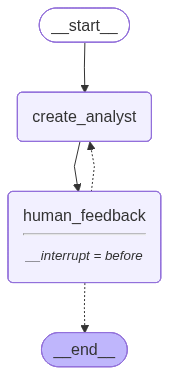

In [33]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [34]:
topic = "the benefits of adopting Langgraph as an agent framework"

In [35]:
max_analysts = 4

In [36]:
thread =  {"configurable":{"thread_id":1}}

In [37]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  
            
        

Name: Alice Chen
Affiliation: Independent AI Lab
Role: AI Research Scientist
Description: Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent workflows and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.
--------------------------------------------------
Name: Bob Johnson
Affiliation: Large Financial Institution
Role: Enterprise Architect
Description: Concerned with the practical benefits of Langgraph for enterprise applications. His focus is on how Langgraph can improve the reliability, scalability, and maintainability of AI-powered systems in a business context. He is also interested in the cost savings and ROI that Langgraph can provide.
--------------------------------------------------
Name: Charlie Davis
Affiliation: Non-profit AI Ethics Organization
Role: AI Ethics Consultant
Description: Prioritizes the ethical implications of using Langgraph.

In [38]:
state = graph.get_state(thread)

In [39]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Chen', role='AI Research Scientist', affiliation='Independent AI Lab', description='Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent workflows and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.'), Analyst(name='Bob Johnson', role='Enterprise Architect', affiliation='Large Financial Institution', description='Concerned with the practical benefits of Langgraph for enterprise applications. His focus is on how Langgraph can improve the reliability, scalability, and maintainability of AI-powered systems in a business context. He is also interested in the cost savings and ROI that Langgraph can provide.'), Analyst(name='Charlie Davis', role='AI Ethics Consultant', affiliation='Non-profit AI Ethics Organization', 

In [40]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'analysts': [Analyst(name='Alice Chen', role='AI Research Scientist', affiliation='Independent AI Lab', description='Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent workflows and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.'),
  Analyst(name='Bob Johnson', role='Enterprise Architect', affiliation='Large Financial Institution', description='Concerned with the practical benefits of Langgraph for enterprise applications. His focus is on how Langgraph can improve the reliability, scalability, and maintainability of AI-powered systems in a business context. He is also interested in the cost savings and ROI that Langgraph can provide.'),
  Analyst(name='Charlie Davis', role='AI Ethics Consultant', affiliation='Non-profit AI Ethics Organization', description='Pr

In [41]:
state.next

('human_feedback',)

In [42]:
# memory.storage

In [43]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0abe9b-b57b-6af0-bfff-662a2e9ef077': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-18T06:14:40.730385+00:00\xa2id\xd9$1f0abe9b-b57b-6af0-bfff-662a2e9ef077\xb0channel_versions\x81\xa9__start__\xd9400000000000000000000000000000001.0.19358629096087598\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0abe9b-b57f-6240-8000-c4a87c7e907f': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-18T06:14:40.731799+00:00\xa2id\xd9$1f0abe9b-b57f-6240-8000-c4a87c7e907f\xb0channel_versions\x84\xa9__start__\xd9400000000000000000000000000000002.0.23794191427870615\xa5topic\xd9400000000000000000000000000000002.0.23794191427870615\xacmax_analysts\xd9400000000000000000000000000000002.0.23794191427870615\xb8branch:to:create_analyst\xd9400000000000000000000000000000002.0.23794191427870615\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start

In [44]:
# import msgpack

# for thread_id, ns_dict in memory.storage.items():
#     print(f"\n Thread ID: {thread_id}")
    
#     # ns_dict = defaultdict(dict, {'': {...}})
#     for ns, ckpts in ns_dict.items():
#         print(f"  Namespace: '{ns}'")
        
#         # ckpts = dict of {checkpoint_id: (packed_values, packed_metadata, parent_id)}
#         for ckpt_id, (packed_values, packed_metadata, parent_id) in ckpts.items():
#             print(f"    Checkpoint ID: {ckpt_id}")
            
#             # Decode msgpack binary
#             values = msgpack.unpackb(packed_values[1], raw=False)
#             meta = msgpack.unpackb(packed_metadata[1], raw=False)
            
#             print(f"    Values keys: {list(values.keys())}")
#             print(f"    Parent ID: {parent_id}")
#             print(f"    Metadata: {meta}")
#             print("-" * 80)


In [45]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0abe9b-d35d-63fc-8001-2abc356ff911'}}

In [46]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0abe9d-8169-6c1a-8002-d561f4040a8c'}}

In [47]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Alice Chen
Affiliation: Independent AI Lab
Role: AI Research Scientist
Description: Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent workflows and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.
--------------------------------------------------
Name: Bob Johnson
Affiliation: Large Financial Institution
Role: Enterprise Architect
Description: Concerned with the practical benefits of Langgraph for enterprise applications. His focus is on how Langgraph can improve the reliability, scalability, and maintainability of AI-powered systems in a business context. He is also interested in the cost savings and ROI that Langgraph can provide.
--------------------------------------------------
Name: Charlie Davis
Affiliation: Non-profit AI Ethics Organization
Role: AI Ethics Consultant
Description: Prioritizes the ethical implications of using Langgraph.

In [48]:
state = graph.get_state(thread)

In [49]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application', 'analysts': [Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups, emphasizing its potential to accelerate development cycles and reduce time to market. Concerned with ease of integration, scalability, and cost-effectiveness for early-stage ventures."), Analyst(name='Dr. Ben Carter', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Evaluates Langgraph's suitability for complex enterprise applications, focusing on its ability to manage multi-agent workflows, ensure reliability, and integrate with existing enterprise systems. Prioritizes security, compliance, and governance in large-scale deployments."), Analy

In [50]:
state.next

('human_feedback',)

In [51]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application',
 'analysts': [Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups, emphasizing its potential to accelerate development cycles and reduce time to market. Concerned with ease of integration, scalability, and cost-effectiveness for early-stage ventures."),
  Analyst(name='Dr. Ben Carter', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Evaluates Langgraph's suitability for complex enterprise applications, focusing on its ability to manage multi-agent workflows, ensure reliability, and integrate with existing enterprise systems. Prioritizes security, compliance, and governance in large-scale deployments."),
  Analyst(name='Priya

In [52]:
# import msgpack

# def get_all_checkpoints(memory, thread_id="1"):
#     """Return all checkpoints in chronological order for a thread."""
#     checkpoints = []
#     ns_dict = memory.storage.get(thread_id, {})
#     if "" not in ns_dict:
#         return []

#     for ckpt_id, (packed_values, packed_meta, parent_id) in ns_dict[""].items():
#         values = msgpack.unpackb(packed_values[1], raw=False)
#         meta = msgpack.unpackb(packed_meta[1], raw=False)
#         checkpoints.append({
#             "id": ckpt_id,
#             "parent": parent_id,
#             "topic": values.get("topic"),
#             "feedback": values.get("human_analyst_feedback"),
#             "analyst_count": len(values.get("analysts", [])),
#             "analysts": [a.model_dump() for a in values.get("analysts", [])],
#             "step": meta.get("step"),
#             "created_at": values.get("ts", None)
#         })
#     return checkpoints

# # Fetch all
# history = get_all_checkpoints(memory)

# # Sort by step (to get chronological order)
# history = sorted(history, key=lambda x: (x["step"] or 0))

# # Display neatly
# for h in history:
#     print(f"\nSTEP {h['step']} | CHECKPOINT {h['id']}")
#     print(f"Parent: {h['parent']}")
#     print(f"Topic: {h['topic']}")
#     print(f"Feedback: {h['feedback']}")
#     print(f"Analysts generated: {h['analyst_count']}")
#     print("-"*100)


In [53]:
# If we are satisfied, then we simply supply no feedback
further_feedack = ""

In [54]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [55]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0abe9e-32a8-6756-8006-a78e9b3f5c1a'}}

In [56]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next)  # should be (END,)


()


In [57]:
analysts = final_state.values.get('analysts')

In [58]:
analysts

[Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups, emphasizing its potential to accelerate development cycles and reduce time to market. Concerned with ease of integration, scalability, and cost-effectiveness for early-stage ventures."),
 Analyst(name='Dr. Ben Carter', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Evaluates Langgraph's suitability for complex enterprise applications, focusing on its ability to manage multi-agent workflows, ensure reliability, and integrate with existing enterprise systems. Prioritizes security, compliance, and governance in large-scale deployments."),
 Analyst(name='Priya Sharma', role='AI Research Scientist', affiliation='AI Research Institute', description="Investigates Langgraph's research potential, particularly its modularity and flexibility for experimenting with novel agent architectur

In [59]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50) 

Name: Ava Chen
Affiliation: InnovateAI
Role: Startup CTO
Description: Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups, emphasizing its potential to accelerate development cycles and reduce time to market. Concerned with ease of integration, scalability, and cost-effectiveness for early-stage ventures.
--------------------------------------------------
Name: Dr. Ben Carter
Affiliation: GlobalTech Solutions
Role: Enterprise AI Architect
Description: Evaluates Langgraph's suitability for complex enterprise applications, focusing on its ability to manage multi-agent workflows, ensure reliability, and integrate with existing enterprise systems. Prioritizes security, compliance, and governance in large-scale deployments.
--------------------------------------------------
Name: Priya Sharma
Affiliation: AI Research Institute
Role: AI Research Scientist
Description: Investigates Langgraph's research potential, particularly its modularity and flexibi

In [60]:
"The benefits of adopting LangGraph as an agent framework"
query = "The benefits of adopting LangGraph as an agent framework"

In [61]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

KeyboardInterrupt: 

#### Using DuckDuckGo for web search

In [62]:
from langchain_community.tools import DuckDuckGoSearchRun
search= DuckDuckGoSearchRun()
search.invoke(query)

Error in engine wikipedia: DDGSException("RuntimeError: RuntimeError('error sending request for url (https://wt.wikipedia.org/w/api.php?action=opensearch&profile=fuzzy&limit=1&search=The%20benefits%20of%20adopting%20LangGraph%20as%20an%20agent%20framework): client error (Connect)\\n\\nCaused by:\\n    0: client error (Connect)\\n    1: dns error: failed to lookup address information: nodename nor servname provided, or not known\\n    2: failed to lookup address information: nodename nor servname provided, or not known')")
response: https://search.yahoo.com/search;_ylt=4-v-VGdxub8x_n0ex2NPLKYd;_ylu=xjEqWKdTA7sn-o57LTDQcYc5N4UeRYiHTUACD8z7iHBQW6E?p=The+benefits+of+adopting+LangGraph+as+an+agent+framework&btf=y 200
response: https://search.brave.com/search?q=The+benefits+of+adopting+LangGraph+as+an+agent+framework&source=web&tf=py 200


"Sep 4, 2025 · By Nuno Campos Summary: We launched LangGraph as a low level agent framework nearly two years ago, and have already seen companies like LinkedIn, Uber, and Klarna use it to build production ready agents . LangGraph builds upon feedback from the super popular LangChain framework , and rethinks how agent frameworks should work for production. We aimed to find the right abstraction for AI agents ... June 30, 2025 - Explore how LangGraph , the graph-based agent framework from LangChain, empowers developers and organizations to orchestrate complex AI workflows, integrate with any LLM, and build practical, scalable AI solutions. Mar 11, 2024 · LangGraph ’ s advanced workflow control, the ability to ensure quality in function calling, the customization of message types and parameters, and convenient state and LLM token management are ... Jun 17, 2025 · Explore how LangGraph , the graph-based agent framework from LangChain, empowers developers and organizations to orchestrate co

"Sep 4, 2025 · By Nuno Campos Summary: We launched LangGraph as a low level agent framework nearly two years ago, and have already seen companies like LinkedIn, Uber, and Klarna use it to build production ready agents . LangGraph builds upon feedback from the super popular LangChain framework , and rethinks how agent frameworks should work for production. We aimed to find the right abstraction for AI agents ... Jun 17, 2025 · Explore how LangGraph , the graph-based agent framework from LangChain, empowers developers and organizations to orchestrate complex AI workflows, integrate with any LLM, and build practical, scalable AI solutions. LangGraph is a Python-based framework designed to manage multi- agent workflows using graph architectures. Unlike linear processes, LangGraph organizes actions as nodes in a directed graph, enabling tasks like conditional decision-making, parallel execution, and persistent state management. Mar 11, 2024 · LangGraph ’ s advanced workflow control, the ability to ensure quality in function calling, the customization of message types and parameters, and convenient state and LLM token management are ... Jun 17, 2025 · Explore how LangGraph , the graph-based agent framework from LangChain, empowers developers and organizations to orchestrate complex AI workflows, integrate with any LLM, and build practical, scalable AI solutions. Developed by the creators of LangChain, LangGraph redefines how developers conceptualize and implement AI workflows, providing a modular and visually intuitive approach to agent architecture that scales from straightforward chatbots to advanced multi- agent cognitive systems. Sep 3, 2025 · What are the main advantages of using the LangGraph AI Framework for multi- agent workflows over traditional linear approaches? The LangGraph AI Framework stands out in multi- agent workflows by introducing dynamic, graph-based orchestration. Feb 19, 2025 · LangGraph is an innovative framework that leverages directed graphs to model AI workflows. Unlike traditional sequential or decision-tree-based logic, LangGraph allows you to define nodes (representing tasks or actions) and edges (representing the flow of information) for more flexible and scalable AI applications. Jul 14, 2025 · When you're building high-performing AI agents for real-world use, LangGraph offers the flexibility, reliability, and control needed to meet enterprise demands, whether you're focused on automation, compliance, or enhanced customer experiences. Here are the top features that make LangGraph stand out: 1. Graph-Based Workflow Design. Developed by the creators of LangChain, LangGraph redefines how developers conceptualize and implement AI workflows, providing a modular and visually intuitive approach to agent architecture that scales from straightforward chatbots to advanced multi- agent cognitive systems."

Either you can use Google Serper API or use duckduckgo

In [63]:
# from langchain_community.document_loaders import WikipediaLoader
# docs = WikipediaLoader(query="The benefits of adopting AWS Cloud").load()
# print(docs[0].page_content[:500])

In [64]:
# from langchain_community.document_loaders import WikipediaLoader
# docs = WikipediaLoader(query="The benefits of adopting AWS Cloud").load()
# print(docs)

In [65]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="AWS").load()
print(docs[0].page_content[:500])

KeyboardInterrupt: 

In [66]:
from langchain_community.utilities import WikipediaAPIWrapper

In [56]:
wiki = WikipediaAPIWrapper(doc_content_chars_max=4000)
docs = wiki.run("The benefits of adopting LangGraph as an agentic framework")
print(docs)

Page: Semantic Web
Summary: The Semantic Web, sometimes known as Web 3.0, is an extension of the World Wide Web through standards set by the World Wide Web Consortium (W3C). The goal of the Semantic Web is to make Internet data machine-readable.
To enable the encoding of semantics with the data, technologies such as Resource Description Framework (RDF) and Web Ontology Language (OWL) are used. These technologies are used to formally represent metadata. For example, ontology can describe concepts, relationships between entities, and categories of things. These embedded semantics offer significant advantages such as reasoning over data and operating with heterogeneous data sources.
These standards promote common data formats and exchange protocols on the Web, fundamentally the RDF. According to the W3C, "The Semantic Web provides a common framework that allows data to be shared and reused across application, enterprise, and community boundaries." The Semantic Web is therefore regarded as

## Second Workflow

In [67]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [68]:
from dotenv import load_dotenv
load_dotenv()
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [69]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)

/var/folders/88/rd80r4td7l7600vkrbdgpc6c0000gn/T/ipykernel_1473/1029971610.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)


In [70]:
tavily_search.invoke("langgraph")

[{'title': 'What is LangGraph? - GeeksforGeeks',
  'url': 'https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/',
  'content': '# What is LangGraph?\n\nLast Updated : \n10 Oct, 2025\n\nSuggest changes\n\n1 Likes\n\nLangGraph is an open-source framework built by LangChain that streamlines the creation and management of AI agent workflows. At its core, LangGraph combines large language models (LLMs) with graph-based architectures allowing developers to map, organize and optimize how AI agents interact and make decisions.',
  'score': 0.9345448},
 {'title': 'Learn LangGraph basics - Overview',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/',
  'content': 'Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.\nLangGraph is very low-level, and focused entirely on agent orchestratio

In [71]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

KeyboardInterrupt: 

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 

In [72]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Search query for retrieval.")

In [73]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [74]:
print(analyst.persona)

Name: David Lee
Role: AI Product Manager
Affiliation: ProductAI Inc.
Description: Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.



In [75]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: David Lee\nRole: AI Product Manager\nAffiliation: ProductAI Inc.\nDescription: Analyzes Langgraph\'s impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understa

In [76]:
'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Consulting\nDescription: Michael analyzes the strategic implications of adopting Langgraph for businesses. He focuses on how the framework can drive innovation, support digital transformation initiatives, and align with long-term business goals.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecting the persona and goals provided to you.'

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Consulting\nDescription: Michael analyzes the strategic implications of adopting Langgraph for businesses. He focuses on how the framework can drive innovation, support digital transformation initiatives, and align with long-term business goals.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you

In [77]:
def generation_question(state:InterviewState):
    """Node to generate the questions"""
    
    #get state
    analyst = state["analyst"]
    messages = state["messages"]
    
    #generate the question
    system_message = question_instructions.format(goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)]+messages)
    
    #returen the question through state
    return {"messages":[question]}

In [78]:
analyst

Analyst(name='David Lee', role='AI Product Manager', affiliation='ProductAI Inc.', description="Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.")

In [79]:
class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

In [80]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],"messages":[HumanMessage(content="hi do the proper search according to the experties")]}

In [81]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='David Lee', role='AI Product Manager', affiliation='ProductAI Inc.', description="Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions."),
 'interview': '',
 'section': [],
 'messages': [HumanMessage(content='hi do the proper search according to the experties', additional_kwargs={}, response_metadata={})]}

In [82]:
result = generation_question(state)

In [83]:
result

{'messages': [AIMessage(content='Okay, here we go.\n\nHi David, my name is Anya Sharma, and I\'m an analyst focusing on the practical applications of new AI technologies. I\'m particularly interested in Langgraph and its potential to reshape AI product development.\n\nGiven your role at ProductAI Inc., you\'re likely seeing firsthand how Langgraph is being used. To start, could you give me a concrete example of a problem in AI product development that Langgraph solves particularly well, and how it compares to previous approaches? I\'m looking for something beyond the general "agent orchestration" benefit – a specific use case where it really shines.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='lc_run--6d35220d-ec9f-432a-9543-1387a45f2e5b-0', usage_metadata={'input_tokens': 235, 'output_tokens': 129, 'total_tokens': 364, 'input_token_details':

{'messages': [AIMessage(content="Okay, here we go.\n\nHi Carlos, my name is Amelia, and I'm an analyst focusing on the practical applications of AI tools for non-technical users. I'm particularly interested in Langgraph and its potential to empower citizen data scientists.\n\nI understand you're an AI Product Manager at DataWise Analytics with a focus on Langgraph's user-friendliness. What are some of the biggest usability hurdles you've observed for citizen data scientists trying to adopt Langgraph? I'm looking for specific examples, not just general challenges.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--091faa01-db5b-49db-bc14-535069af68ec-0', usage_metadata={'input_tokens': 234, 'output_tokens': 115, 'total_tokens': 349, 'input_token_details': {'cache_read': 0}})]}



In [84]:
print(result["messages"][0].content)

Okay, here we go.

Hi David, my name is Anya Sharma, and I'm an analyst focusing on the practical applications of new AI technologies. I'm particularly interested in Langgraph and its potential to reshape AI product development.

Given your role at ProductAI Inc., you're likely seeing firsthand how Langgraph is being used. To start, could you give me a concrete example of a problem in AI product development that Langgraph solves particularly well, and how it compares to previous approaches? I'm looking for something beyond the general "agent orchestration" benefit – a specific use case where it really shines.


In [85]:
from langchain_core.messages import get_buffer_string

In [86]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")

In [87]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+state["messages"])
    
    # Search
    search_docs = tavily_search.invoke(search_query.search_query)
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

In [88]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [89]:
result = search_web(state)

In [90]:
print(result["context"][0])

<Document href="https://www.ema.co/additional-blogs/addition-blogs/building-ai-agents-langgraph"/>
When you’re building AI agents that need to be reliable, adaptable, and aligned with enterprise workflows, LangGraph gives you a strong foundation to do just that. The following are the key benefits you can expect when using LangGraph for your AI initiatives:

1. Built-In State Management [...] By now, you’ve seen how LangGraph empowers you to build structured, intelligent AI agents that are not only adaptable but also enterprise-ready. From graph-based workflows and persistent memory to multi-agent coordination and human-in-the-loop controls, LangGraph brings the modularity and transparency today’s businesses need to automate with confidence. [...] ## What is LangGraph?

LangGraph is an open-source framework designed for building stateful, multi-actor AI agents using graph-based computation. It enables you to define complex workflows where each node in the graph represents a function, a 

In [91]:
def search_wikipedia(state:InterviewState):
    """
    Retrieve data from wiki
    """
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state['messages'])
    
    print("*******************************")
    print(search_query)
    
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 
    

In [92]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [93]:
result = search_wikipedia(state)

*******************************
search_query='Langgraph framework benefits for business innovation'


In [94]:
search_docs = WikipediaLoader(query='Langgraph framework benefits',load_all_available_meta=True).load()

In [95]:
search_docs

[]

In [96]:
result

{'context': ['']}

In [97]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [99]:
def generate_answer(state:InterviewState):
   
    """ Node to answer a question """

    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals=analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)]+messages)
            
    # Name the message as coming from the expert
    answer.name = "expert"
    
    # Append it to state
    return {"messages": [answer]}
    

how many analyst we were doing to be create:
4

max_trun:2

means if atleast 2 expert are giving ans then we can save the result.

In [100]:
def route_messages(state: InterviewState, 
                   name: str = "expert"):

    """ Route between question and answer """
    
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns',2)

    # Check the number of expert answers 
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # End if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return 'save_interview'

    # This router is run after each question - answer pair 
    # Get the last question asked to check if it signals the end of discussion
    last_question = messages[-2]
    
    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [101]:
def save_interview(state: InterviewState):
    
    """ Save interviews """

    # Get messages
    messages = state["messages"]
    
    # Convert interview to a string
    interview = get_buffer_string(messages)
    
    # Save to interviews key
    return {"interview": interview}

In [102]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [103]:
def write_section(state: InterviewState):

    """ Node to answer a question """

    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]
   
    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus=analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Use this source to write your section: {context}")]) 
                
    # Append it to state
    return {"sections": [section.content]}


In [104]:
interview_builder = StateGraph(InterviewState)

In [105]:
interview_builder.add_node("ask_question",generation_question)
interview_builder.add_node("search_web",search_web)
interview_builder.add_node("search_wikipedia",search_wikipedia)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_section",write_section)

In [106]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_wikipedia")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_wikipedia","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           route_messages,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [107]:
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")


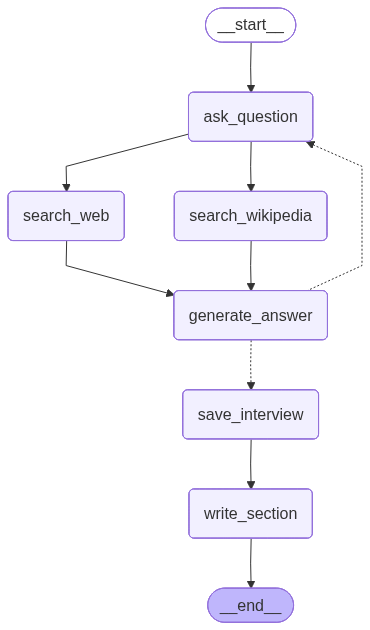

In [108]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [109]:
analyst

Analyst(name='David Lee', role='AI Product Manager', affiliation='ProductAI Inc.', description="Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.")

In [110]:
analyst.persona

"Name: David Lee\nRole: AI Product Manager\nAffiliation: ProductAI Inc.\nDescription: Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.\n"

In [111]:
thread = {"configurable": {"thread_id": "1"}}

In [112]:
from IPython.display import Markdown

In [113]:
messages = [HumanMessage("So you said you were writing an article on Langchain?")]

In [114]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turns": 2}, thread)

*******************************
search_query='LangGraph streamlines agent orchestration compared to previous methods'
*******************************
search_query='LangGraph financial analysis multi-agent system'


In [115]:
Markdown(interview['sections'][0])

## Langgraph: Orchestrating the Future of AI Product Development

### Summary

LangGraph is emerging as a pivotal framework for orchestrating complex interactions within multi-agent systems, streamlining workflows, and optimizing task allocation [1]. It simplifies the development of state machines by representing them as graphs, making them easier to manage compared to traditional methods like LangChain [1]. This is particularly beneficial for complex Large Language Model (LLM) applications [1]. LangGraph's architecture, built around a directed acyclic graph (DAG) structure, efficiently manages workflows, streamlining complex processes as more agents connect and resource demands grow [2].

While LangGraph offers powerful orchestration capabilities, its operational demands, including debugging, monitoring, and infrastructure requirements, can be overwhelming [2]. Platforms like Latenode simplify these complexities by offering managed infrastructure, intuitive workflow mapping, and streamlined error tracing [2]. This allows teams to focus on refining agent logic rather than grappling with the intricacies of distributed systems management [2].

LangGraph is trusted by companies shaping the future of agents, including Klarna, Replit, and Elastic [3]. It is a low-level orchestration framework for building, managing, and deploying long-running, stateful agents [3]. Before using LangGraph, it is recommended to familiarize oneself with the components used to build agents, starting with models and tools [3].

LangGraph's ability to visualize the graph, isolate failures, and re-run just the failed node saves operational headaches [5]. In a multi-agent architecture design, LangGraph provides powerful workflow orchestration capabilities that align well with the dynamic nature of financial analysis [4]. It supports both directional and recursive workflows, so you can model everything from straightforward sequential processes to complex iterative analyses that evolve based on intermediate findings [4].

### Sources

[1] https://medium.com/@shubham.shardul2019/is-langgraph-the-ultimate-multi-agent-maestro-explore-its-potential-and-hidden-hurdles-c7e454a3e089
[2] https://latenode.com/blog/langgraph-multi-agent-orchestration-complete-framework-guide-architecture-analysis-2025
[3] https://docs.langchain.com/oss/python/langgraph/overview
[4] https://aws.amazon.com/blogs/machine-learning/build-an-intelligent-financial-analysis-agent-with-langgraph-and-strands-agents/
[5] https://www.auxiliobits.com/blog/langchain-vs-langgraph-choosing-the-right-orchestration-framework-for-agentic-automation/

## third Workflow

In [116]:
from typing_extensions import TypedDict
from typing import List, Annotated
import operator
class ResearchGraphState(TypedDict):
    topic: str # Research topic
    max_analysts: int # Number of analysts
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    sections: Annotated[list, operator.add] # Send() API key
    introduction: str # Introduction for the final report
    content: str # Content for the final report
    conclusion: str # Conclusion for the final report
    final_report: str # Final report
    

In [117]:
from langgraph.types import Send

In [118]:
def initiate_all_interviews(state:ResearchGraphState):
    """ This is the "map" step where we run each interview sub-graph using Send API """ 
    
    #check if human feedback
    human_analyst_feedback=state.get('human_analyst_feedback')
    if human_analyst_feedback:
        # Return to create_analysts
        return "create_analysts"
    
    # Otherwise kick off interviews in parallel via Send() API
    else:
        topic = state["topic"]
        return [Send("conduct_interview", {"analyst": analyst,
                                        "messages": [HumanMessage(
                                            content=f"So you said you were writing an article on {topic}?"
                                        )
                                                ]}) for analyst in state["analysts"]]


In [119]:
# def write_report(state:ResearchGraphState):
#     """_summary_

#     Args:
#         state (ResearchGraphState): _description_
#     """
#     pass

In [120]:
def write_introduction(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    intro = llm.invoke([instructions]+[HumanMessage(content=f"Write the report introduction")]) 
    return {"introduction": intro.content}

In [121]:
def write_report(state:ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]
    
    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    intro = llm.invoke([instructions]+[HumanMessage(content=f"Write the report introduction")]) 
    return {"introduction": intro.content}

    

In [122]:
def write_conclusion(stae:ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    conclusion = llm.invoke([instructions]+[HumanMessage(content=f"Write the report conclusion")]) 
    return {"conclusion": conclusion.content}
    

In [123]:
def finalize_report(state: ResearchGraphState):
    """ The is the "reduce" step where we gather all the sections, combine them, and reflect on them to write the intro/conclusion """
    # Save full final report
    content = state["content"]
    if content.startswith("## Insights"):
        content = content.strip("## Insights")
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    final_report = state["introduction"] + "\n\n---\n\n" + content + "\n\n---\n\n" + state["conclusion"]
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources
    return {"final_report": final_report}

In [124]:
# Add nodes and edges 
builder = StateGraph(ResearchGraphState)
builder.add_node("create_analysts", create_analyst)
builder.add_node("human_feedback", human_feedback)
builder.add_node("conduct_interview", interview_builder.compile())
builder.add_node("write_report",write_report)
builder.add_node("write_introduction",write_introduction)
builder.add_node("write_conclusion",write_conclusion)
builder.add_node("finalize_report",finalize_report)

# Logic
builder.add_edge(START, "create_analysts")
builder.add_edge("create_analysts", "human_feedback")
builder.add_conditional_edges("human_feedback", initiate_all_interviews, ["create_analysts", "conduct_interview"])
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")
builder.add_edge(["write_conclusion", "write_report", "write_introduction"], "finalize_report")
builder.add_edge("finalize_report", END)


: 

In [1]:
print("hi")

hi
